<a href="https://colab.research.google.com/github/letsgetdangerous/Distance_Correlation/blob/master/Dist_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This begins my distance correlation experimentation

In [0]:
import numpy as np
from scipy.spatial import distance_matrix as dist
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
n = 5
x = np.linspace(1,5,num = n)
np.random.seed(123)
y = 1 + x**3 + np.random.normal(scale = 5,size = n)

In [0]:
x.shape = (n,1)
y.shape = (n,1)

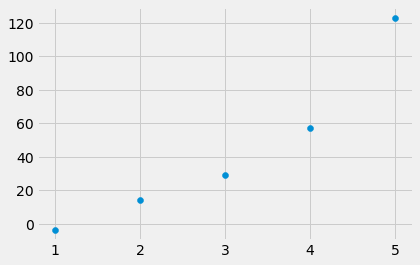

In [25]:
plt.scatter(x,y)

In [0]:
a = dist(x,x, p=2)
b = dist(y,y, p=2)
A = a - np.reshape(np.average(a, axis = 0),(5,1)) - np.reshape(np.average(a,axis = 1),(1,5)) + np.average(a) 
B = b - np.reshape(np.average(b, axis = 0),(5,1)) - np.reshape(np.average(b,axis = 1),(1,5)) + np.average(b)

In [0]:
dcov = np.sum(A*B)/n**2
dvarX = np.sum(A*A)/n**2
dvarY = np.sum(B*B)/n**2
dcorr = dcov / np.sqrt(dvarX*dvarY)
dbeta = dcorr * np.sqrt(dvarY / dvarX)

In [51]:
new = dist(x,np.array([[2.0]]))
new = new - np.reshape(np.average(a, axis = 0),(5,1))
#new = new * dcorr * np.sqrt(dvarY / dvarX)
#new = new + np.reshape(np.average(a, axis = 0),(5,1)) + np.reshape(np.average(a,axis = 1),(1,5)) + np.average(a)
print(new * dbeta)
print(np.reshape(np.average(b, axis = 0),(5,1)))
 

[[-27.9890396 ]
 [-39.18465544]
 [ -5.59780792]
 [ 16.79342376]
 [ 27.9890396 ]]
[[47.53795139]
 [37.08902324]
 [34.00339019]
 [39.61411698]
 [78.99720036]]
